In [3]:
using XLSX
using Distributed
using Plots
using JLD

# aggiungi mypath alla lista di percorsi di ricerca
push!(LOAD_PATH, "/Users/robertonetti/Documents/GitHub/FCSeqTools.jl/Example_Proteins/");

In [5]:
# includi il file myfile.jl
#@everywhere include("FCSeqTools.jl")
include("other_analysis/FCSeqTools.jl")
#include("FCSeqTools.jl");
#include("functions.jl");

natural_sequences = do_number_matrix_prot(do_letter_matrix("CM_130530_MC.fasta"), 0.2);
ref_seq = natural_sequences[1,:];

LoadError: SystemError: opening file "/Users/robertonetti/Documents/GitHub/FCSeqTools.jl/Example_Proteins/other_analysis/other_analysis/FCSeqTools.jl": No such file or directory

## Single site entropy: *pseudo_count = 0.5*

In [64]:
method = "cumulative"
fraction = 0.3
stop = 0.9
folder_name = method*string(fraction)*"_stop="*string(stop)

folder_name = folder_name * "_reg=0.5"
folder_path = "/Users/robertonetti/Documents/GitHub/FCSeqTools.jl/Example_Proteins/"*folder_name*"/"  

fields_05 = JLD.load(folder_path*"h.jld")["data"]
couplings_05 = JLD.load(folder_path*"Jij.jld")["data"];

q = 21
pseudo_count = 0.5
threshold = 0.2

prof_site_entropy = site_entropy_vector(natural_sequences, q, pseudo_count, threshold);
EAA_site_entropy = full_model_site_entropy(q, ref_seq, fields_05, couplings_05, pseudo_count, threshold);

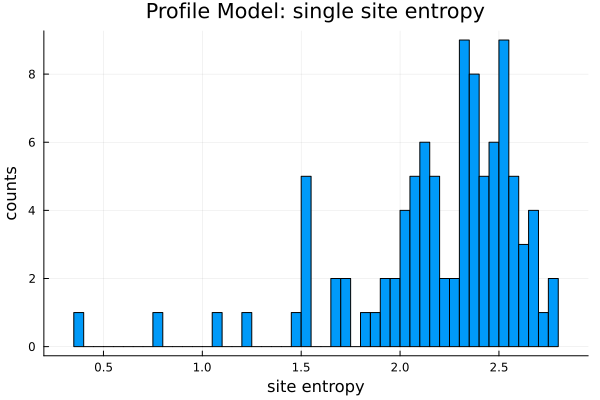

In [72]:
histogram(prof_site_entropy, bins=50, title= "Profile Model: single site entropy", xlabel="site entropy", ylabel="counts", label =:false)
#savefig("prof_entropy_reg.png")

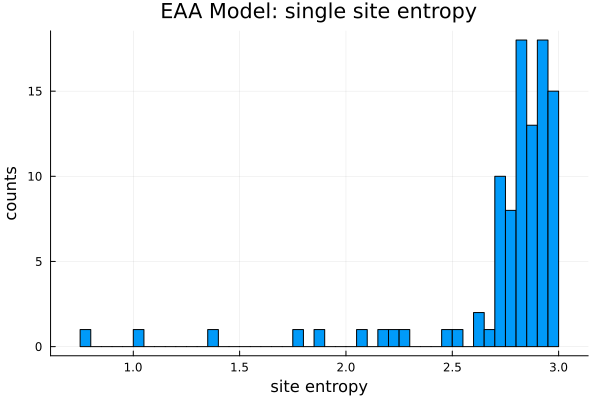

In [74]:
histogram(EAA_site_entropy, bins=50, title= "EAA Model: single site entropy", xlabel="site entropy", ylabel="counts", label =:false)
#savefig("EAA_entropy_reg.png")

# Single-site entropies: *pseudo-count = 0.05*

In [68]:
method = "cumulative"
fraction = 0.3
stop = 0.9
folder_name = method*string(fraction)*"_stop="*string(stop)

folder_path = "/Users/robertonetti/Documents/GitHub/FCSeqTools.jl/Example_Proteins/"*folder_name*"/"  

fields_005 = JLD.load(folder_path*"h.jld")["data"]
couplings_005 = JLD.load(folder_path*"Jij.jld")["data"];

q = 21
pseudo_count = 0.05
threshold = 0.2

prof_site_entropy_005 = site_entropy_vector(natural_sequences, q, pseudo_count, threshold);
EAA_site_entropy_005 = full_model_site_entropy(q, ref_seq, fields_005, couplings_005, pseudo_count, threshold);

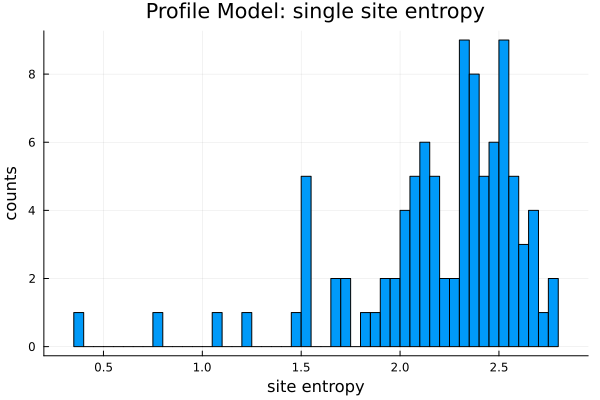

In [76]:
histogram(prof_site_entropy_005, bins=50, title= "Profile Model: single site entropy", xlabel="site entropy", ylabel="counts", label =:false)
#savefig("prof_entropy_no_reg.png")

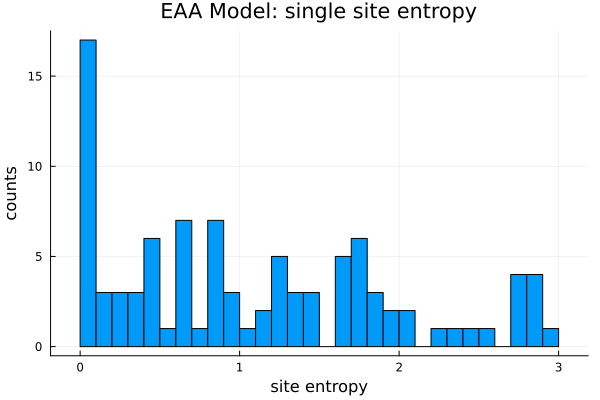

In [78]:
histogram(EAA_site_entropy_005, bins=50, title= "EAA Model: single site entropy", xlabel="site entropy", ylabel="counts", label =:false)
#savefig("EAA_entropy_no_reg.png")
